# Toy example with Rocchio Algorithm

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm 

In [2]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_blobs

In [7]:
X, y = make_blobs(n_samples=100, centers = 2, n_features = 2, cluster_std = 1.0, random_state = 0)
ri, ni = [i for i, x in enumerate(y) if x == 1], [i for i, x in enumerate(y) if x == 0]
R = X[ri, :]
N = X[ni, :]
q = X[ri[:20] + ni[:15]].mean(axis=0)

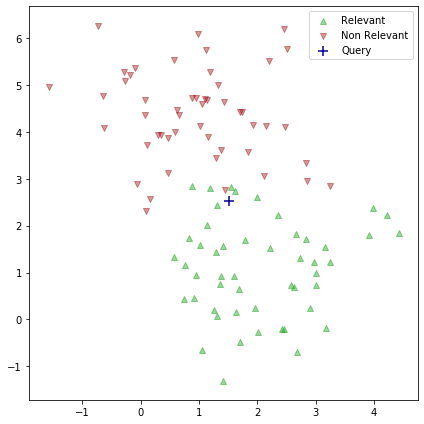

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(R[:,0], R[:,1], c="#009900", marker="^", alpha=0.4, label='Relevant')
ax.scatter(N[:,0], N[:,1], c="#990000", marker="v", alpha=0.4, label='Non Relevant')
ax.scatter(q[0], q[1], c="#000099", marker="+", s=100, label="Query")
ax.legend()
plt.tight_layout()
plt.show()

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_recall_fscore_support

In [10]:
sigma = cosine_similarity(q.reshape(1, -1), X)

In [13]:
results = [i for i, x in sorted(enumerate(sigma[0]), key = lambda z: -z[1])]
gtruth = [1 if i in ri else 0 for i in results]

In [14]:
precision_recall_fscore_support(np.ones(R.shape[0]), gtruth[:R.shape[0]], average='macro', zero_division = 0)

(0.5, 0.17, 0.2537313432835821, None)

## Relevance Feedback

In [23]:
tp = [x for x in results if x in ri]
fp = [x for x in results if x in ni]

In [24]:
positive_feedback = X[tp, :]
negative_feedback = X[fp, :]

In [25]:
def rocchio(q, pos, neg, alpha = 0.5, beta = 0.25, gamma = 0.25):
    Pos = pos.mean(axis=0)
    Neg = neg.mean(axis=0)
    return alpha * q + beta * Pos - gamma * Neg

In [26]:
qm = rocchio(q, positive_feedback, negative_feedback)

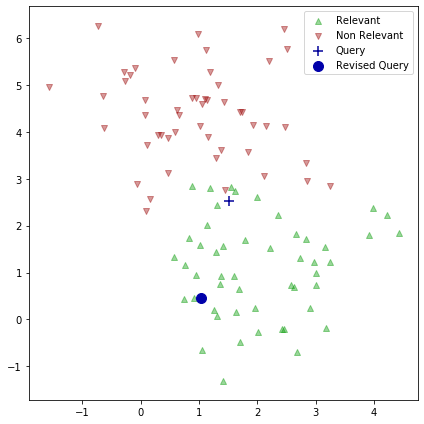

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(R[:,0], R[:,1], c="#009900", marker="^", alpha=0.4, label='Relevant')
ax.scatter(N[:,0], N[:,1], c="#990000", marker="v", alpha=0.4, label='Non Relevant')
ax.scatter(q[0], q[1], c="#000099", marker="+", s=100, label="Query")
ax.scatter(qm[0], qm[1], c="#0000aa", marker="o", s=100, label="Revised Query")
ax.legend()
plt.tight_layout()
plt.show()

In [29]:
sigma = cosine_similarity(qm.reshape(1, -1), X)

In [30]:
results = [i for i, x in sorted(enumerate(sigma[0]), key = lambda z: -z[1])]
gtruth = [1 if i in ri else 0 for i in results]

In [31]:
precision_recall_fscore_support(np.ones(R.shape[0]), gtruth[:R.shape[0]], average='macro', zero_division=0)

(0.5, 0.43, 0.4623655913978495, None)